In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

from descriptors.acsf.sf_function import SymmetryFunction
plt.style.use({'figure.facecolor':'white'})

In [24]:
def plot_rdf(data, ax):
    # fig = plt.figure(figsize=(8, 6))
    center_atom = data['center_atom'].unique()[0]
    another_atom = data['another_atom'].unique()[0]

    # ax = fig.add_subplot()
    # ax.set_title(f"{center_atom}-{another_atom} RDF", fontsize = 14)
    ax.set_xlabel("r(Å)", size = 10, weight = "light", fontsize=15)
    ax.set_ylabel(f"g(r) {center_atom}-{another_atom}", size = 10, weight = "light", fontsize=15)
    ax.set_xlim([0,10])
    x = list(map(lambda i: round(float(i),2),data.columns[4:]))

    mean = data.mean()[1:]
    std = data.std()[1:]

    ax.fill_between(x, mean + std, mean - std, alpha=0.2, color='red')
    ax.plot(x, mean, color='red')

In [22]:
# SFプロット
def plot_sf(sf_parameters, bond, ax, save_dir=None, save_filename=None):
    r_cut_list = [];
    for param in sf_parameters:
        r_cut_list.append(param[-1])
    r_cut = max(r_cut_list)
    acsf = SymmetryFunction()
    r_ij = np.linspace(0, r_cut, 100)
    # fig = plt.figure(figsize=(8,6))
    # ax = fig.add_subplot(111)
    # ax.set_title(f'symmetry function parameters {bond}')
    ax.set_xlabel(f'r(Å)', fontsize=15)
    ax.set_ylabel(r'$e^{-\eta(R_{ij}-R_{s})^2}f_{c}(R_{ij})$', fontsize=15)
    # ax.set_ylabel(r'$2^{1-\zeta} (1+\lambda \cos\theta_{ijk})^\zeta$')
    ax.set_xlim([0,10])
    for param in sf_parameters:
        ax.plot(r_ij,
                [acsf.radial_symmetry_function_2(eta=param[0], r_ij=k, r_shift=param[1], r_cutoff=param[2]) for k in
                 r_ij], label=f'η: {param[0]} | Rs: {param[1]}')
    # ax.legend()
    # fig.show()
    if save_dir is None:
        return
    fig.savefig(f'{save_dir}/{save_filename}.png')

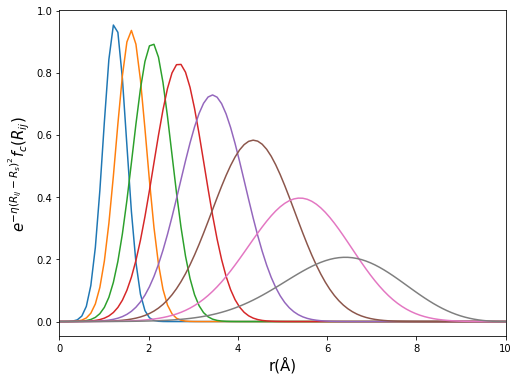

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
params = [
    [7.263E+00, 1.250E+00, 1.000E+01],
    [4.319E+00, 1.621E+00, 1.000E+01],
    [2.568E+00, 2.102E+00, 1.000E+01],
    [1.527E+00, 2.726E+00, 1.000E+01],
    [9.079E-01, 3.536E+00, 1.000E+01],
    [5.399E-01, 4.585E+00, 1.000E+01],
    [3.210E-01, 5.946E+00, 1.000E+01],
    [1.909E-01, 7.711E+00, 1.000E+01]
]
plot_sf(params,bond='Si-Si' ,ax=ax, save_dir=None)

<ipython-input-24-263a09e45dd1>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean()[1:]
<ipython-input-24-263a09e45dd1>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = data.std()[1:]


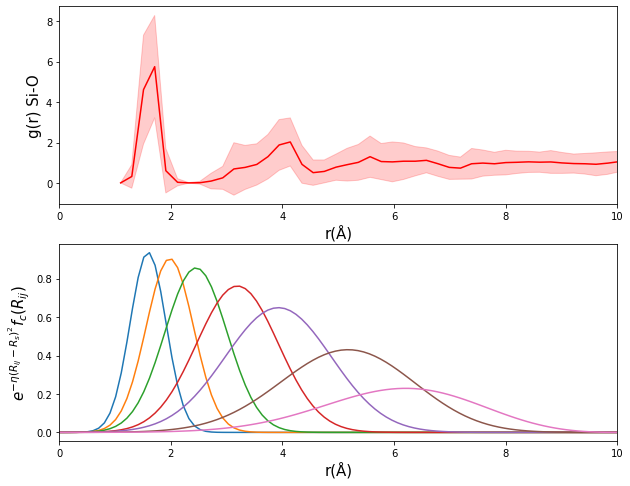

In [32]:
# params_Si_Si = [[7, 2.7, 15.0], [2.3, 3.2, 15.0], [1.051, 4.5, 15.0], [0.6629, 5, 15.0], [0.4183, 6.5, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]
# params_O_O = [[7, 2.5, 15.0], [2.3, 2.993, 15.0], [1.051, 4.0, 15.0], [0.6629, 4.743, 15.0], [0.4183, 5.972, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]
# params_O_Si = [[7, 1.7, 15.0], [2.3, 2.1, 15.0], [1.051, 4.0, 15.0], [0.6629, 4.6, 15.0], [0.4183, 5.972, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]
rdf_path = '/Users/y1u0d2/Desktop/Lab/result/rdf/rdf_structure_all_converge_one/'
files = glob.glob(f'{rdf_path}/*')
file = files[2]
df = pd.read_csv(file)
save_dir = '/Users/y1u0d2/desktop/Lab/result/nnp-train/two-three-body/07/sf_params'
bond = "Si-O"
save_filename = '10_7'
# params = [
#     [4.771, 2.429, 10.0],
#     [2.736, 2.886, 10.0],
#     [1.569, 3.491, 10.0],
#     [0.9, 4.289, 10.0],
#     [0.5162, 5.343, 10.0],
#     [0.296, 6.735, 10.0],
#     [0.1698, 8.573, 10.0]
# ]
# params = [
#     [4.771 ,2.629 ,10.0],
#     [2.736 ,3.086 ,10.0],
#     [1.569 ,3.791 ,10.0],
#     [0.9 ,4.689 ,10.0],
#     [0.5162 ,5.543 ,10.0],
#     [0.296 ,6.735 ,10.0],
#     [0.1698 ,8.573 ,10.0]
# ]
params = [
    [4.771, 1.6 ,10.0],
    [2.736 ,2.0 ,10.0],
    [1.569 ,2.491 ,10.0],
    [0.9 ,3.289 ,10.0],
    [0.5162 ,4.143 ,10.0],
    [0.296 ,5.735 ,10.0],
    [0.1698 ,7.573 ,10.0],
]
fig, axes= plt.subplots(2,1,figsize=(10,8))
plot_rdf(df, ax=axes[0])
plot_sf(params,bond=bond ,ax=axes[1])
fig.savefig(f'{save_dir}/sf_{bond}.png')

In [23]:
for param in params:
     print(f'symfunction_short Si  2 Si {param[0]} {param[1]} {param[2]}')

symfunction_short Si  2 Si 4.771 2.629 10.0
symfunction_short Si  2 Si 2.736 3.086 10.0
symfunction_short Si  2 Si 1.569 3.791 10.0
symfunction_short Si  2 Si 0.9 4.689 10.0
symfunction_short Si  2 Si 0.5162 5.543 10.0
symfunction_short Si  2 Si 0.296 6.735 10.0
symfunction_short Si  2 Si 0.1698 8.573 10.0


In [7]:
mean


1.1014492753623188    0.000219
1.3043478260869565    0.318071
1.5072463768115942    4.619998
1.710144927536232     5.755971
1.9130434782608696    0.603878
                        ...   
14.08695652173913     1.000199
14.28985507246377     0.986559
14.492753623188406    0.992884
14.695652173913045    0.973396
14.898550724637682    1.006655
Length: 69, dtype: float64

<ipython-input-3-0daa3050624e>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean()[1:]
<ipython-input-3-0daa3050624e>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = data.std()[1:]


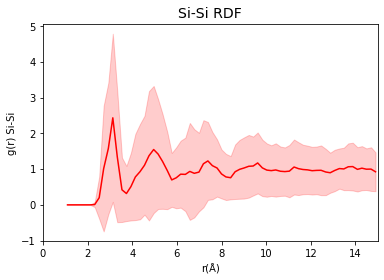

In [10]:
# params_Si_Si = [[7, 2.7, 15.0], [2.3, 3.2, 15.0], [1.051, 4.5, 15.0], [0.6629, 5, 15.0], [0.4183, 6.5, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]
# params_O_O = [[7, 2.5, 15.0], [2.3, 2.993, 15.0], [1.051, 4.0, 15.0], [0.6629, 4.743, 15.0], [0.4183, 5.972, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]
# params_O_Si = [[7, 1.7, 15.0], [2.3, 2.1, 15.0], [1.051, 4.0, 15.0], [0.6629, 4.6, 15.0], [0.4183, 5.972, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]
rdf_path = '/Users/y1u0d2/Desktop/Lab/result/rdf/rdf_structure_all_converge_one/'
files = glob.glob(f'{rdf_path}/*')
file = files[1]
df = pd.read_csv(file)
bond = "Si-Si"
fig, ax= plt.subplots()
plot_rdf(df, ax=ax)
fig.savefig(f'/Users/y1u0d2/Desktop/Lab/result/rdf/rdf_{bond}.png')

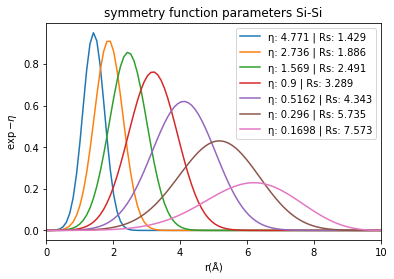

In [4]:
fig, ax = plt.subplots()
params = [
    [4.771E+00, 1.429E+00, 1.000E+01],
    [2.736E+00, 1.886E+00, 1.000E+01],
    [1.569E+00, 2.491E+00, 1.000E+01],
    [9.000E-01, 3.289E+00, 1.000E+01],
    [5.162E-01, 4.343E+00, 1.000E+01],
    [2.960E-01, 5.735E+00, 1.000E+01],
    [1.698E-01, 7.573E+00, 1.000E+01],
]
plot_sf(params,bond='Si-Si' ,ax=ax, save_dir=None)